<a href="https://colab.research.google.com/github/Szalacha1/FinalYearProject/blob/main/Shortened_Forecasting_withMAPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd 
from tensorflow import keras
import keras as k
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
import plotly.offline as py
import plotly.graph_objs as go
import keras_tuner as kt
import tensorflow as tf
from IPython.display import SVG
import os
import datetime, time
import random
from keras import backend as K
from keras.regularizers import L1L2
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('gold_price_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("gold_price_data.csv")
df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [ ]:
df.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


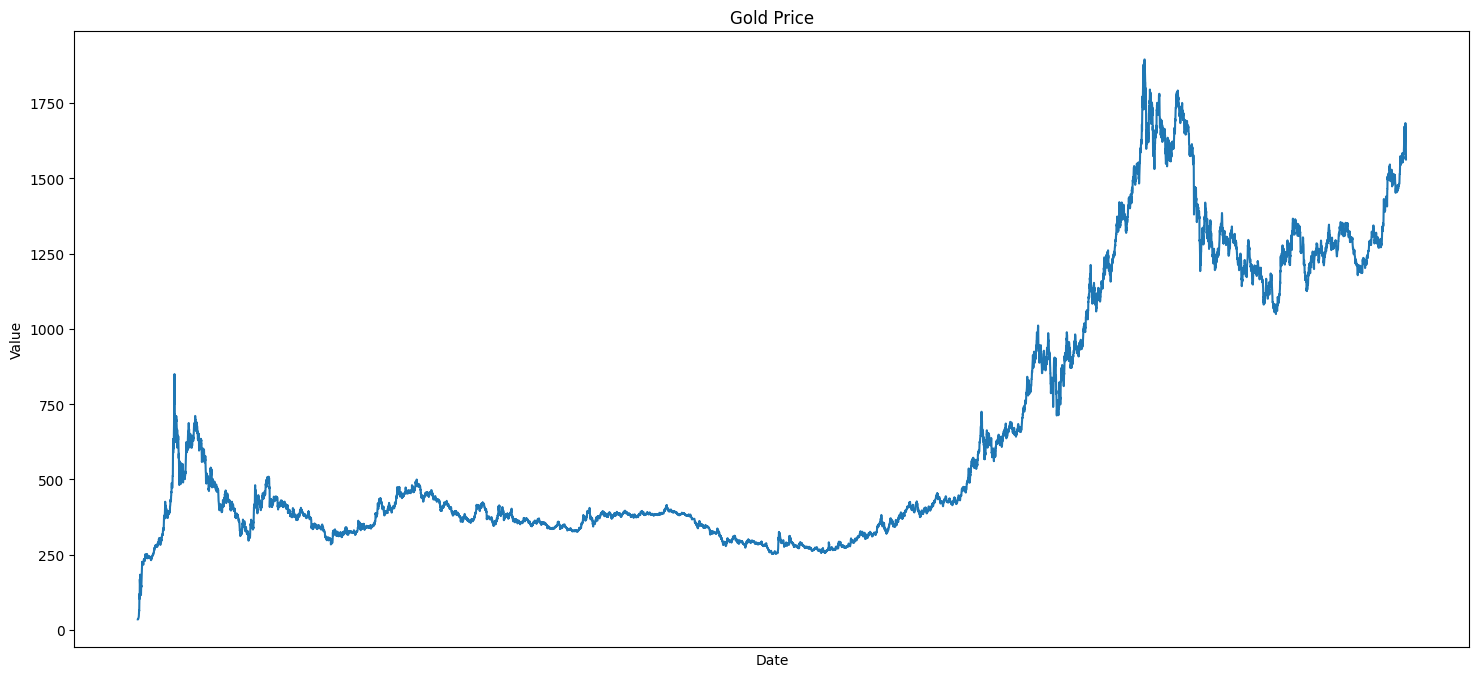

In [ ]:
plt.figure(figsize = (18,8))
sns.lineplot(data=df, x="Date", y="Value")
plt.title('Gold Price')
plt.xticks([]) 
plt.show()

In [ ]:
train_len = int(df.shape[0]*0.70)
train = df[0:train_len]
test =df[train_len:]

In [ ]:
train

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
7545,2007-10-11,749.00
7546,2007-10-12,749.50
7547,2007-10-15,758.85
7548,2007-10-16,756.75


In [ ]:
test

,Date,Value
7550,2007-10-18,764.15
7551,2007-10-19,763.00
7552,2007-10-22,751.25
7553,2007-10-23,758.25
7554,2007-10-24,757.50
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [ ]:
#Finding optimal number of epochs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

# Load the data
df = pd.read_csv("gold_price_data.csv")

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train = df[0:train_size]
test = df[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train['Value'].values.reshape(-1, 1))

# Create sequences
lookback = 100

def create_sequences(data, lookback):
    X = []
    y = []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

X_train, y_train = create_sequences(train_scaled, lookback)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Determine the optimal number of epochs
num_epochs = len(history.history['loss'])

print("Optimal number of epochs: ", num_epochs)

Epoch 1/100
214/214 [==============================] - 32s 130ms/step - loss: 7.2047e-04 - val_loss: 2.9604e-04
Epoch 2/100
214/214 [==============================] - 26s 123ms/step - loss: 4.8977e-05 - val_loss: 7.0196e-04
Epoch 3/100
214/214 [==============================] - 26s 124ms/step - loss: 4.6820e-05 - val_loss: 4.3237e-04
Epoch 4/100
214/214 [==============================] - 26s 120ms/step - loss: 4.2812e-05 - val_loss: 1.9239e-04
Epoch 5/100
214/214 [==============================] - 25s 117ms/step - loss: 4.1232e-05 - val_loss: 1.9252e-04
Epoch 6/100
214/214 [==============================] - 27s 124ms/step - loss: 3.7341e-05 - val_loss: 6.5474e-04
Epoch 7/100
214/214 [==============================] - 27s 124ms/step - loss: 3.4359e-05 - val_loss: 4.0772e-04
Optimal number of epochs:  7


In [ ]:
#Find optimum Sequence Length 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv("gold_price_data.csv")

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df['Value'].values.reshape(-1, 1))

# Define the sequence length range to test
sequence_lengths = [25,50,75,100]

# Define the model architecture
def create_model(sequence_length):
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
    model.add(Dense(units=1))
    return model

# Train and evaluate the models for different sequence lengths
mse_list = []
for sequence_length in sequence_lengths:
    # Create sequences
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Split the data into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Create the model
    model = create_model(sequence_length)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluate the model
    y_pred = scaler.inverse_transform(model.predict(X_test))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    print("Sequence length:", sequence_length, "MSE:", mse)

# Find the best sequence length
best_sequence_length = sequence_lengths[np.argmin(mse_list)]
print("Best sequence length:", best_sequence_length)


Epoch 1/50
270/270 [==============================] - 8s 20ms/step - loss: 0.0025 - val_loss: 4.9451e-04
Epoch 2/50
270/270 [==============================] - 6s 22ms/step - loss: 9.1560e-05 - val_loss: 2.0585e-04
Epoch 3/50
270/270 [==============================] - 5s 18ms/step - loss: 8.2371e-05 - val_loss: 2.6235e-04
Epoch 4/50
270/270 [==============================] - 5s 20ms/step - loss: 7.8439e-05 - val_loss: 1.9184e-04
Epoch 5/50
270/270 [==============================] - 5s 19ms/step - loss: 7.3615e-05 - val_loss: 2.5214e-04
Epoch 6/50
270/270 [==============================] - 5s 18ms/step - loss: 6.9084e-05 - val_loss: 3.9306e-04
Epoch 7/50
270/270 [==============================] - 6s 23ms/step - loss: 6.6115e-05 - val_loss: 2.6435e-04
Epoch 8/50
270/270 [==============================] - 5s 18ms/step - loss: 7.0112e-05 - val_loss: 4.9765e-04
Epoch 9/50
270/270 [==============================] - 5s 20ms/step - loss: 6.1660e-05 - val_loss: 1.7281e-04
Epoch 10/50
270/270 [==

In [ ]:
#Finding optimal batch size 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv("gold_price_data.csv")

# Split the data into train, validation and test sets
train_size = int(len(df) * 0.6)
val_size = int(len(df) * 0.2)
test_size = len(df) - train_size - val_size
train, val, test = np.split(df.sample(frac=1), [train_size, train_size+val_size])

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train['Value'].values.reshape(-1, 1))
val_scaled = scaler.transform(val['Value'].values.reshape(-1, 1))
test_scaled = scaler.transform(test['Value'].values.reshape(-1, 1))

# Create sequences
lookback = 100

def create_sequences(data, lookback):
    X = []
    y = []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

X_train, y_train = create_sequences(train_scaled, lookback)
X_val, y_val = create_sequences(val_scaled, lookback)

# Define the hyperparameters to tune
batch_sizes = [16, 32, 64, 128]

# Initialize variables to store the results
best_batch_size = None
best_test_loss = float('inf')

# Train the models with different batch sizes
for batch_size in batch_sizes:
    print("Training with batch size:", batch_size)
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=32))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size,
                        validation_data=(X_val, y_val), callbacks=[es])

    # Evaluate the model on the test set
    X_test, y_test = create_sequences(test_scaled, lookback)
    test_loss = model.evaluate(X_test, y_test)
    
    print("Test loss with batch size {}: {}".format(batch_size, test_loss))
    
    # Update the best batch size
    if test_loss < best_test_loss:
        best_batch_size = batch_size
        best_test_loss = test_loss

# Print the optimal batch size
print("Optimal batch size:", best_batch_size)

Training with batch size: 16
Epoch 1/100
399/399 [==============================] - 51s 115ms/step - loss: 0.0571 - val_loss: 0.0539
Epoch 2/100
399/399 [==============================] - 45s 113ms/step - loss: 0.0555 - val_loss: 0.0538
Epoch 3/100
399/399 [==============================] - 43s 108ms/step - loss: 0.0553 - val_loss: 0.0537
Epoch 4/100
399/399 [==============================] - 46s 115ms/step - loss: 0.0551 - val_loss: 0.0540
Epoch 5/100
399/399 [==============================] - 45s 113ms/step - loss: 0.0553 - val_loss: 0.0536
Epoch 6/100
399/399 [==============================] - 42s 106ms/step - loss: 0.0550 - val_loss: 0.0538
Epoch 7/100
399/399 [==============================] - 43s 108ms/step - loss: 0.0551 - val_loss: 0.0544
Epoch 8/100
399/399 [==============================] - 44s 110ms/step - loss: 0.0552 - val_loss: 0.0536
Epoch 9/100
399/399 [==============================] - 42s 105ms/step - loss: 0.0550 - val_loss: 0.0539
Epoch 10/100
399/399 [=============

68/68 [==============================] - 3s 37ms/step
MSE: 281.8490862947827
RMSE: 16.788361632237457
MAPE: 0.008852875155162391


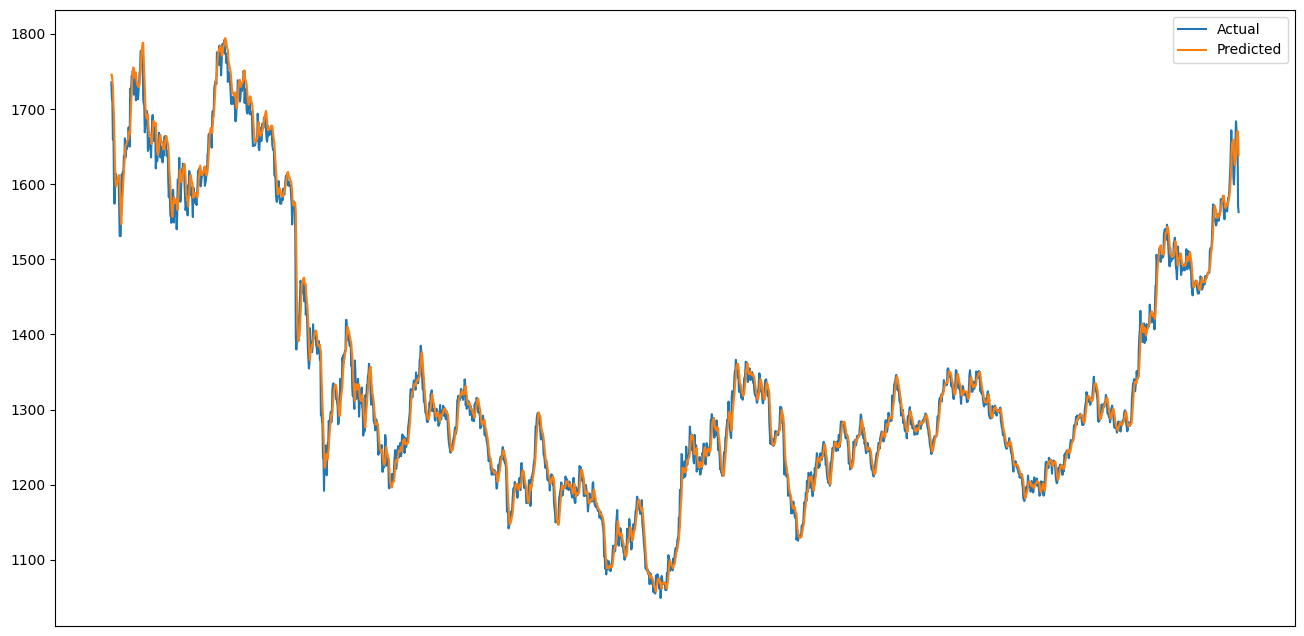

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

# Load the data
df = pd.read_csv("gold_price_data.csv")

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train = df[0:train_size]
test = df[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train['Value'].values.reshape(-1, 1))

# Create sequences
lookback = 25

def create_sequences(data, lookback):
    X = []
    y = []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

X_train, y_train = create_sequences(train_scaled, lookback)

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   input_shape=(X_train.shape[1], 1),
                   activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'], default='tanh')))
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=hp.Float('learning_rate', min_value=1e-6, max_value=1e-3, sampling='LOG')),
                  loss=MeanSquaredError())
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='gold_price_prediction'
)

tuner.search(X_train, y_train,
             epochs=7,
             batch_size=16,
             validation_split=0.2)

best_model = tuner.get_best_models(num_models=1)[0]

# Save the best model to a file
best_model.save('bmodel')

# Prepare the test data
inputs = df['Value'].values[len(df) - len(test) - lookback:]
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test, y_test = create_sequences(inputs, lookback)

# Get predictions
predictions = best_model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)

# Calculate MSE, RMSE, and MAPE
mse = mean_squared_error(test['Value'].values, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Value'].values, predictions)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
# Plot the predictions
plt.figure(figsize=(16,8))
plt.plot(test['Value'].values)
plt.plot(predictions)
plt.legend(['Actual', 'Predicted'])
plt.xticks([]) 
plt.show()


In [14]:
tuner.results_summary()

Results summary
Results in my_dir/gold_price_prediction
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0 summary
Hyperparameters:
units: 384
activation: relu
learning_rate: 0.00017002901853841384
Score: 0.00010792310058604926

Trial 4 summary
Hyperparameters:
units: 512
activation: relu
learning_rate: 1.6245546532638391e-06
Score: 0.00011917888089859237

Trial 1 summary
Hyperparameters:
units: 448
activation: sigmoid
learning_rate: 0.00038205583920142603
Score: 0.00014504369028145447

Trial 3 summary
Hyperparameters:
units: 64
activation: tanh
learning_rate: 0.00017275437490106753
Score: 0.00014699265254118168

Trial 2 summary
Hyperparameters:
units: 224
activation: sigmoid
learning_rate: 1.7662359809316873e-06
Score: 0.00015214770246529952


In [15]:
# Reshape y_test to match predictions shape
y_test = y_test.reshape(-1, 1)

# Inverse scaling for y_test
y_test = scaler.inverse_transform(y_test)
# Create a pandas DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test.reshape(-1),
    'Predicted': predictions.reshape(-1)
})
# Print the first 10 rows of the results DataFrame
print(results_df.head(10))
# Print the last 10 rows of the results DataFrame
print(results_df.tail(10))


   Actual    Predicted
0  1735.5  1745.682861
1  1715.0  1745.763062
2  1709.0  1738.052246
3  1659.5  1729.801514
4  1672.5  1706.055298
5  1603.0  1692.642212
6  1574.0  1658.901733
7  1594.0  1623.887695
8  1598.0  1606.097046
9  1613.5  1597.134277
       Actual    Predicted
2148  1599.65  1645.922119
2149  1615.50  1631.107056
2150  1641.85  1624.869141
2151  1659.60  1629.893799
2152  1683.65  1641.111084
2153  1672.50  1658.997925
2154  1655.70  1669.187988
2155  1653.75  1670.448975
2156  1570.70  1669.416382
2157  1562.80  1638.324951


In [16]:
# Calculate area under the curve for actual and predicted values
area_actual = np.trapz(test['Value'].values)
area_predicted = np.trapz(predictions.flatten())

# Print the areas
print("Area under the curve for actual values:", area_actual)
print("Area under the curve for predicted values:", area_predicted)
# Calculate the difference between the areas
area_diff = abs(area_actual - area_predicted)

# Print the difference between the areas
print("Difference between actual and predicted area under the curve:", area_diff)

Area under the curve for actual values: 2894999.05
Area under the curve for predicted values: 2899709.5
Difference between actual and predicted area under the curve: 4710.450000000186


337/337 [==============================] - 29s 85ms/step


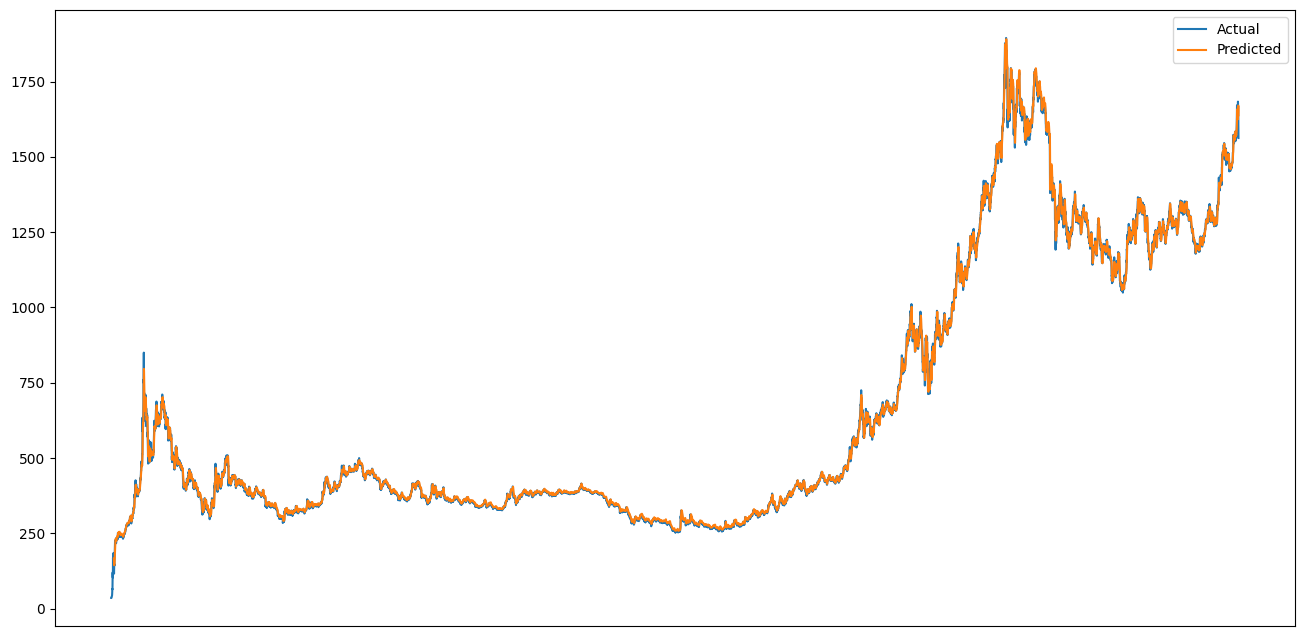

          Date   Value  Predictions
0   1970-01-01   35.20          NaN
1   1970-04-01   35.10          NaN
2   1970-07-01   35.40          NaN
3   1970-10-01   36.20          NaN
4   1971-01-01   37.40          NaN
..         ...     ...          ...
95  1979-03-22  242.85   246.440613
96  1979-03-23  242.50   246.910995
97  1979-03-26  245.25   247.183151
98  1979-03-27  244.35   248.157379
99  1979-03-28  244.40   248.693207

[100 rows x 3 columns]
             Date    Value  Predictions
10687  2019-10-28  1492.40  1503.692261
10688  2019-10-29  1486.75  1502.444336
10689  2019-10-30  1492.10  1499.119263
10690  2019-10-31  1510.95  1497.907104
10691  2019-11-01  1508.80  1503.249268
...           ...      ...          ...
10782  2020-03-09  1672.50  1658.997925
10783  2020-03-10  1655.70  1669.187988
10784  2020-03-11  1653.75  1670.448975
10785  2020-03-12  1570.70  1669.416382
10786  2020-03-13  1562.80  1638.324951

[100 rows x 3 columns]


In [17]:
#Loading extracted model onto main dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('bmodel')

# Load the data
df = pd.read_csv('gold_price_data.csv')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Value'].values.reshape(-1, 1))

# Create sequences
lookback = 25

def create_sequences(data, lookback):
    X = []
    y = []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

X, y = create_sequences(scaled_data, lookback)

# Get predictions
predictions = model.predict(X)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)

# Add the predicted values to the original dataframe
df['Predictions'] = np.nan
df.iloc[lookback:len(df), -1] = predictions.reshape(-1)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(df['Value'].values)
plt.plot(df['Predictions'].values)
plt.legend(['Actual', 'Predicted'])
plt.xticks([]) 
plt.show()
# Print the first 100 rows of the dataframe
print(df.head(100))
# Print the last 100 rows of the dataframe
print(df.tail(100))
